In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [56]:
df = pd.read_csv('measurements.csv',decimal=',')
#小数点が,のためdecimal=','を追加

In [57]:
df.shape

(388, 12)

388行、１２列

In [58]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [59]:
df.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,13.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,37.115385
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,8.587282
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,37.600000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,39.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
distance         388 non-null float64
consume          388 non-null float64
speed            388 non-null int64
temp_inside      376 non-null float64
temp_outside     388 non-null int64
specials         93 non-null object
gas_type         388 non-null object
AC               388 non-null int64
rain             388 non-null int64
sun              388 non-null int64
refill liters    13 non-null float64
refill gas       13 non-null object
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [38]:
#必要な変数を選択

specialは大した情報が入ってないので除去する。またrefilガスはガスタイプとほぼ同じであるため削除

In [74]:
df_cl = df.drop(['specials','refill gas'],axis=1)

In [75]:
df_cl.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters
0,28.0,5.0,26,21.5,12,E10,0,0,0,45.0
1,12.0,4.2,30,21.5,13,E10,0,0,0,NaN
2,11.2,5.5,38,21.5,15,E10,0,0,0,NaN
3,12.9,3.9,36,21.5,14,E10,0,0,0,NaN
4,18.5,4.5,46,21.5,15,E10,0,0,0,NaN


In [118]:
#refill litersにNANがあるためNANを０で補完

df_cl = df_cl.fillna(0)
df_cl

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters
0,28.0,5.0,26,21.5,12,E10,0,0,0,45.0
1,12.0,4.2,30,21.5,13,E10,0,0,0,0.0
2,11.2,5.5,38,21.5,15,E10,0,0,0,0.0
3,12.9,3.9,36,21.5,14,E10,0,0,0,0.0
4,18.5,4.5,46,21.5,15,E10,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,0.0
384,16.1,4.3,38,25.0,31,SP98,1,0,0,0.0
385,16.0,3.8,45,25.0,19,SP98,0,0,0,0.0
386,15.4,4.6,42,25.0,31,SP98,1,0,0,0.0


In [119]:
#gas_typeを数値化のために構成項目を表示
import collections
c = collections.Counter(df_cl['gas_type'])
print(c)

Counter({'SP98': 228, 'E10': 160})


In [120]:
#ダミー変数化
df_clm = pd.get_dummies(df_cl)


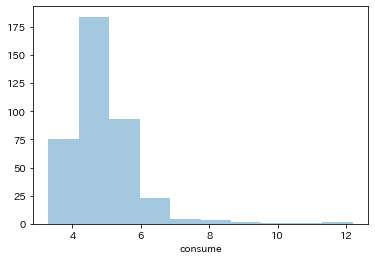

In [121]:
#散布図マトリックスで関係性を図示
sns.distplot(df_cl['consume'], kde=False,bins=10)
plt.show()

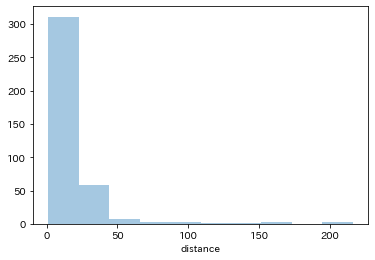

In [102]:
sns.distplot(df_cl['distance'], kde=False,bins=10)
plt.show()

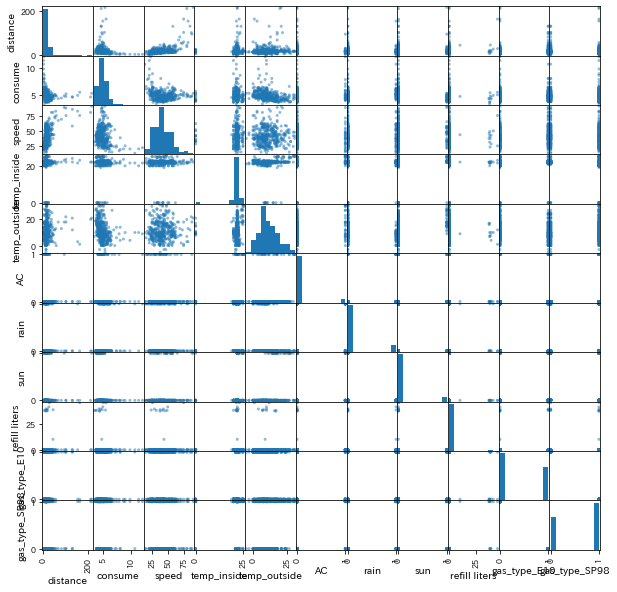

In [123]:
#傾向を見るため散布図マトリックスで図示
pd.plotting.scatter_matrix(df_clm, figsize=(10,10))
plt.show()

Consumeと相関がある変数がなさそう・・・なのでとりあえず全てを説明変数としてモデルを作成

相関係数をヒートマップ化

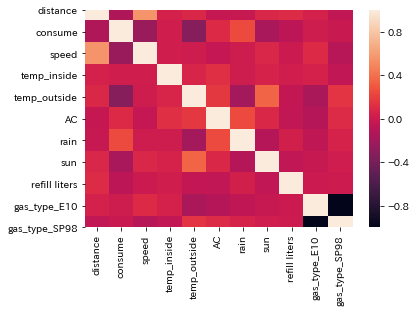

In [104]:
sns.heatmap(df_clm.corr())
plt.show()

目的変数と、説明変数に分ける

In [105]:
y = df_clm['consume'].values
X = df_clm.drop(['consume'],axis =1).values

In [106]:
model = LinearRegression(fit_intercept=True)
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

評価

In [109]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# 値を予測
y_pred =model.predict(X)

# MSEを計算
mse = mean_squared_error(y, y_pred) 
print("MSE = %s"%round(mse,3) )  

# MAEを計算
mae = mean_absolute_error(y, y_pred) 
print("MAE = %s"%round(mae,3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

MSE = 0.838
MAE = 0.613
RMSE = 0.915


In [110]:
#重みをを取り出す
intercept = model.intercept_
coef = model.coef_

In [111]:
coef

array([ 0.00256214, -0.0191626 ,  0.01184986, -0.04346236,  0.35144678,
        0.54074522, -0.18437138, -0.01492752,  0.0099431 , -0.0099431 ])

In [124]:
#distanceとgas typeがあまり効果的でなさそうなので除いて再度モデルを作成
y = df_clm['consume'].values
X2 = df_clm.drop(['consume','distance','gas_type_E10','gas_type_SP98'],axis =1).values

In [125]:
model.fit(X2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
# 値を予測
y_pred2 =model.predict(X2)

# MSEを計算
mse = mean_squared_error(y, y_pred2) 
print("MSE = %s"%round(mse,3) )  

# MAEを計算
mae = mean_absolute_error(y, y_pred2) 
print("MAE = %s"%round(mae,3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

MSE = 0.84
MAE = 0.612
RMSE = 0.916


あまり変わらなかった・・・